**Import required libraries**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, probplot

**Creating a copy of the df**

In [3]:
dataset = pd.read_csv(r"C:\Users\Msc 1\Desktop\Sumu\MDSC-102 P\wine\wine.data")

dataset.columns=['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols',
'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline' ]

df = dataset.copy()

df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoid phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

**Plotting histogram(with density curve), boxplot and probability plot for each feature**

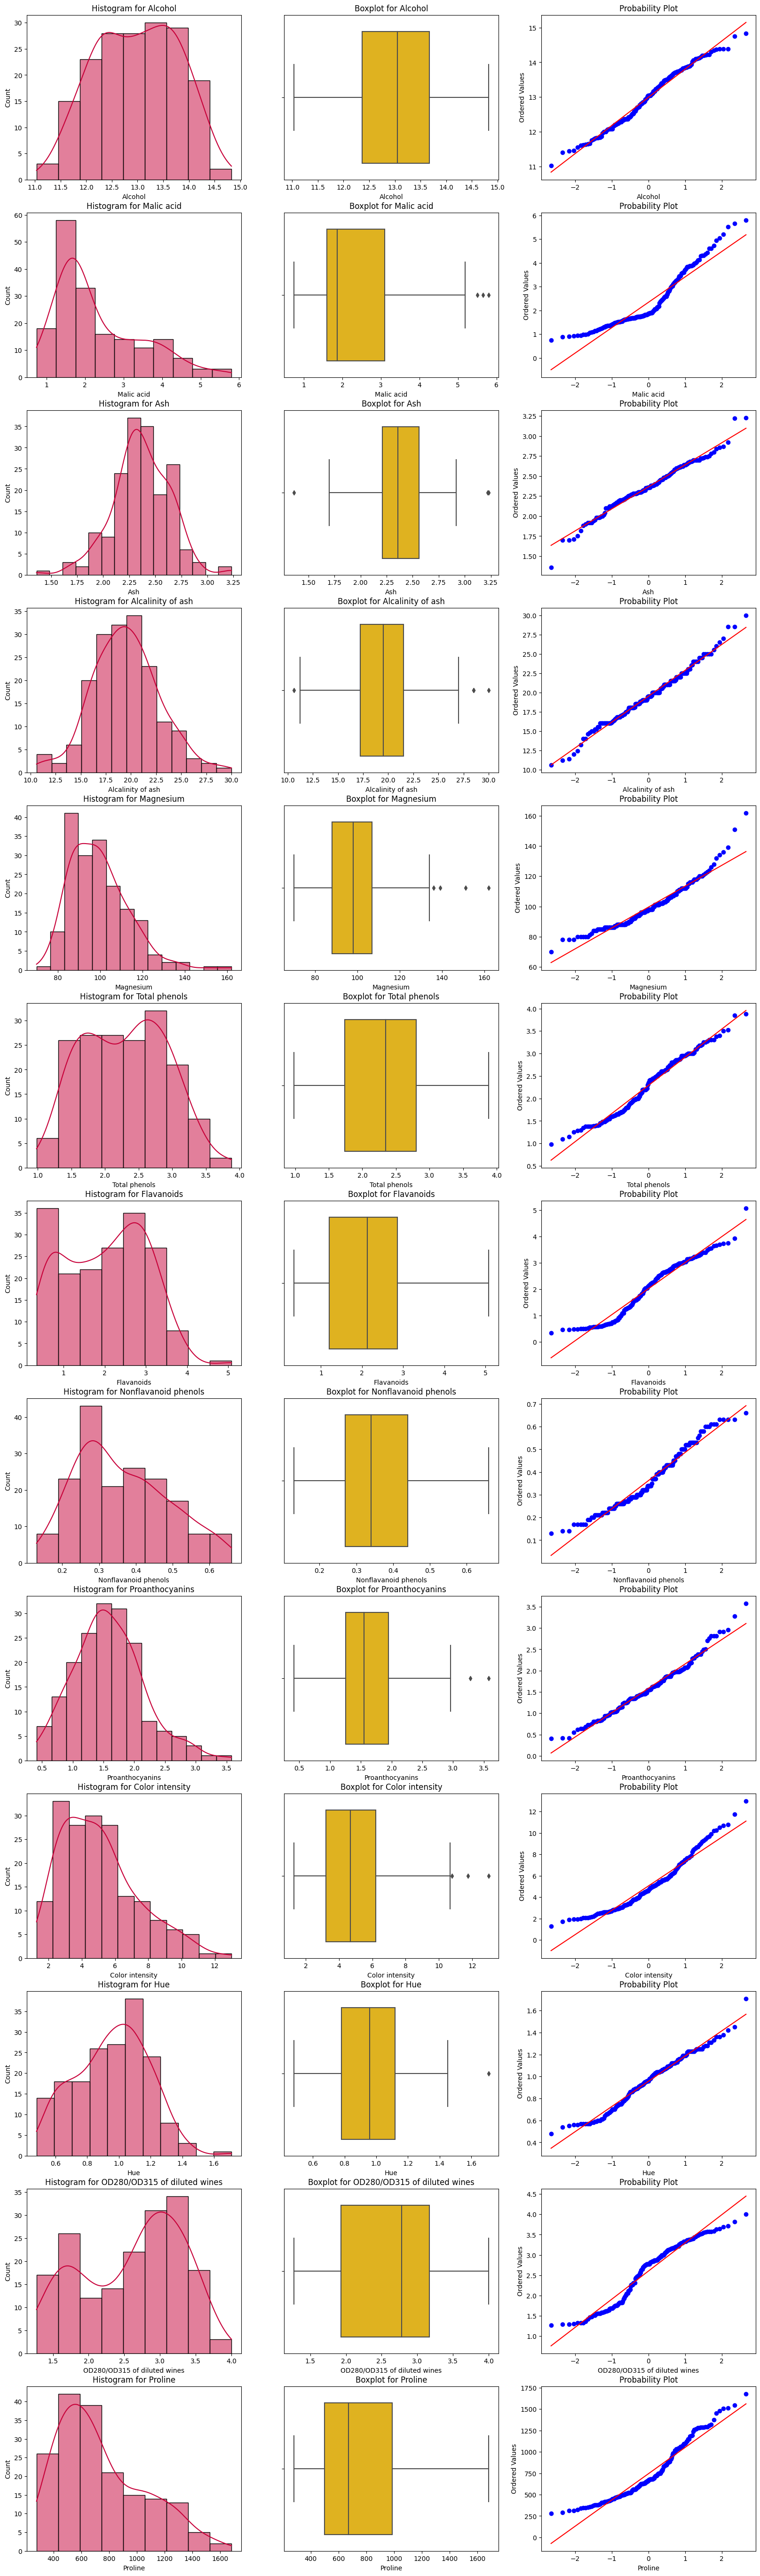

In [7]:
i=1
plt.figure(figsize=(20,70))
for feature in df:
    if feature!='Class':

        #Histogram
        plt.subplot(13,3,i)
        
        plt.title('Histogram for {}'.format(feature))
        ax=sns.histplot(x=df[feature], kde=True, color = '#C70039')

        i+=1

        #Boxplot
        plt.subplot(13,3,i)

        plt.title('Boxplot for {}'.format(feature))
        ax=sns.boxplot(x=df[feature], color = '#FFC300')

        i+=1

        #Probability Plot
        plt.subplot(13,3,i)

        plt.title('ProbPlot for {}'.format(feature))
        probplot(x=df[feature], plot=plt)
        plt.xlabel(feature)

        i+=1

**Inferences from the plots:**

Alcohol                       : Left skewed   (Left whisker longer)           
Malic acid                    : Right skewed  (Right whisker longer) 
Ash                           : Left skewed   (Left whisker longer)  
Alcalinity of ash             : Almost normalised (Symmetric curve)
Magnesium                     : Right skewed  (Right whisker longer) 
Total phenols                 : Slightly Right skewed  (Right whisker longer) 
Flavanoids                    : Almost normalised (Symmetric curve)
Nonflavanoid phenols          : Right skewed  (Right whisker longer)
Proanthocyanins               : Right skewed  (Right whisker longer)
Color intensity               : Right skewed  (Right whisker longer)
Hue                           : Almost normalised (Symmetric curve)
OD280/OD315 of diluted wines  : Left skewed   (Left whisker longer)  
Proline                       : Right skewed  (Right whisker longer)

**Using boxcox function to normalise the data and plotting new plots for each feature**

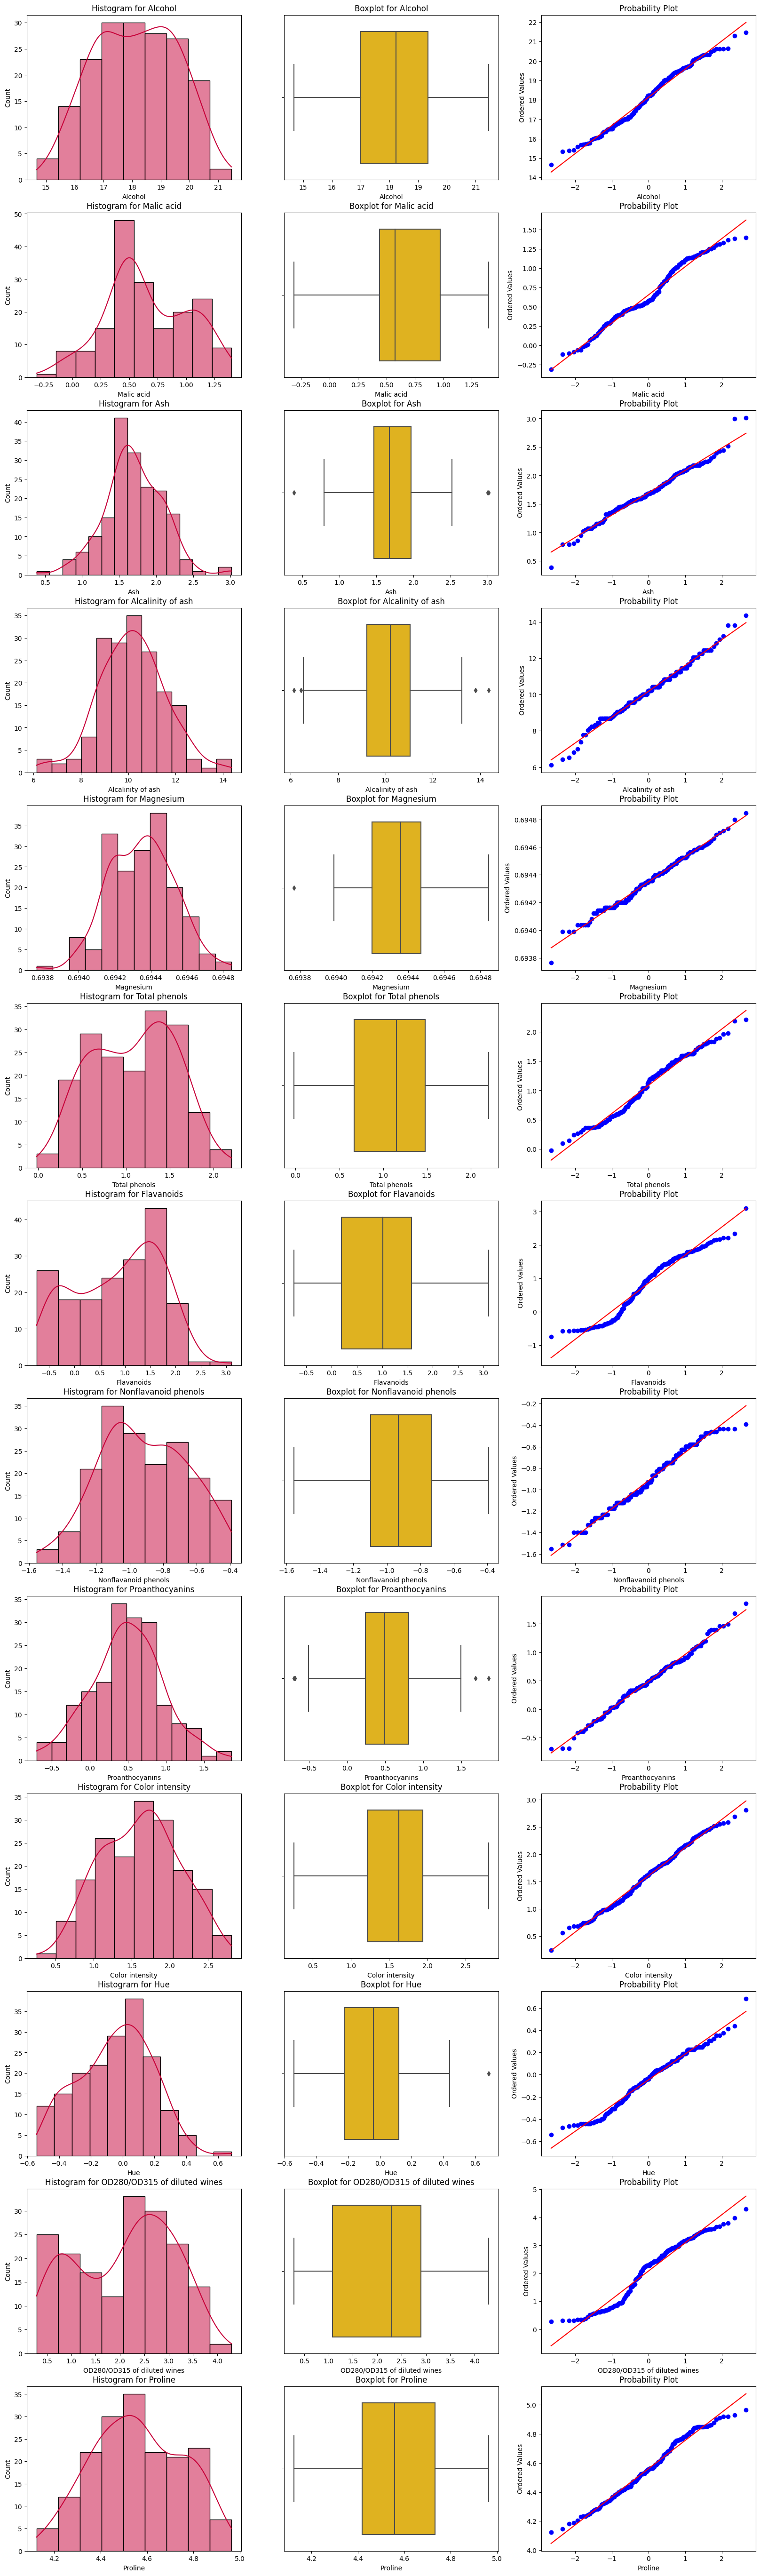

In [17]:
new_skew={}
plt.figure(figsize=(20,70))
i=1
for feature in df:
    if feature!='Class':

        #Boxcox function to normalise the data
        z=boxcox(df[feature])
        lamb=z[1]
        y=(df[feature]**lamb -1)/lamb
        
        new_skew[feature]=y.skew()

        #Histogram
        plt.subplot(13,3,i)
        
        plt.title('Histogram for {}'.format(feature))
        ax=sns.histplot(x=y, kde=True, color = '#C70039')

        i+=1

        #Boxplot
        plt.subplot(13,3,i)

        plt.title('Boxplot for {}'.format(feature))
        ax=sns.boxplot(x=y, color = '#FFC300')

        i+=1

        #Probability Plot
        plt.subplot(13,3,i)

        plt.title('ProbPlot for {}'.format(feature))
        probplot(x=y, plot=plt)
        plt.xlabel(feature)

        i+=1


**Skewness before boxcox**

In [18]:
print('Skew of each feature before boxcox: ')
x=df.skew()
x

Skew of each feature before boxcox: 


Class                           0.097941
Alcohol                        -0.046483
Malic acid                      1.030975
Ash                            -0.172406
Alcalinity of ash               0.204076
Magnesium                       1.122148
Total phenols                   0.097688
Flavanoids                      0.036880
Nonflavanoid phenols            0.440937
Proanthocyanins                 0.532787
Color intensity                 0.870850
Hue                             0.026964
OD280/OD315 of diluted wines   -0.320424
Proline                         0.783800
dtype: float64

**Skewness after boxcox**

In [11]:
print('Skew of each feature after boxcox: \n')

for x in new_skew:
    y=(31-len(x))*' '
    z=(30-len(x))*' '
    if new_skew[x]<0:
        print(x,z,new_skew[x].round(6))
    else:
        print(x,y,new_skew[x].round(6))

Skew of each feature after boxcox: 

Alcohol                         -0.022001
Malic acid                       0.02686
Ash                              0.053339
Alcalinity of ash                0.019255
Magnesium                        0.003966
Total phenols                   -0.059211
Flavanoids                      -0.183191
Nonflavanoid phenols            -0.022381
Proanthocyanins                  0.005616
Color intensity                 -0.006625
Hue                             -0.043721
OD280/OD315 of diluted wines    -0.180509
Proline                          0.013475


**Final inference:**

After using boxcox function, the skew values of features are closer to zero. 
Although they're not completely normalised, they're close to normal.